# import library & dataset

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = pd.read_csv('armenian_market_car.csv',sep=';')
df.head()

,Car Name,Year,Region,FuelType,Mileage,Price
0,Ford Transit,2002,Goris,Diesel,215000,12000
1,Ford Focus,2017,Ijevan,Gasoline,72000,11500
2,Opel Vectra,1998,Armavir,Gasoline,466000,4000
3,Mazda 6,2020,Nor Nork,Gasoline,100000,22000
4,Opel Vectra,1998,Armavir,Gasoline,318000,3500


# data understanding & visualization

In [3]:
# volume data
df.shape

(7995, 6)

In [4]:
# basic information by dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7995 entries, 0 to 7994
Data columns (total 6 columns):
Car Name    7995 non-null object
Year        7995 non-null int64
Region      7995 non-null object
FuelType    7995 non-null object
Mileage     7995 non-null int64
Price       7995 non-null int64
dtypes: int64(3), object(3)
memory usage: 374.8+ KB


In [5]:
# check duplicated
df.duplicated().any()

True

In [6]:
# see data duplicated
df[df.duplicated()]

,Car Name,Year,Region,FuelType,Mileage,Price
7296,BMW X5,2024,Germany,Diesel,10,40000
7345,BMW iX1,2024,Germany,Electric,10,35000
7346,BMW iX1,2024,Germany,Electric,10,35000
7347,BMW iX1,2024,Germany,Electric,10,35000
7376,Mercedes-Benz EQE AMG,2023,Germany,Electric,10,35000
7433,BMW iX1,2023,Germany,Electric,12000,32000
7497,Mercedes-Benz EQB,2023,Germany,Electric,6900,25000
7508,Mercedes-Benz EQA,2023,Germany,Electric,10,25000
7509,Mercedes-Benz EQA,2023,Germany,Electric,10,25000


In [7]:
# drop duplicates
df = df.drop_duplicates()

In [8]:
# doublue checking
df[df.duplicated()] 

,Car Name,Year,Region,FuelType,Mileage,Price


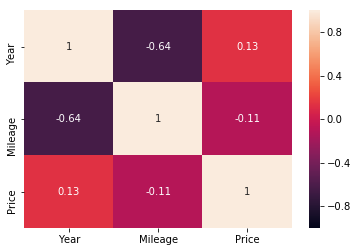

In [9]:
# visualize corelatiion of numerical colums
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

In [10]:
# range date of dataset
print(f'This dataset starts begin {df["Year"].min()} to {df["Year"].max()}')

This dataset starts begin 1943 to 2024


In [11]:
# list for feature
# we take colum that have correlation with label (Price)
importand_colum = []

In [12]:
time_sell = df.groupby(['Year'])['Price'].mean()
time_sell.head()

Year
1943     5500.000000
1950     4700.000000
1954    22000.000000
1955    12666.666667
1957    11600.000000
Name: Price, dtype: float64

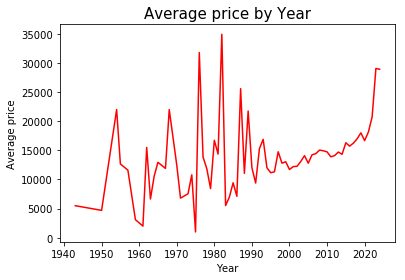

In [13]:
# lineplot visualization
sns.lineplot(x=time_sell.index, y=time_sell.values, color='red')
plt.title('Average price by Year', fontsize=15)
plt.ylabel('Average price')
plt.show()

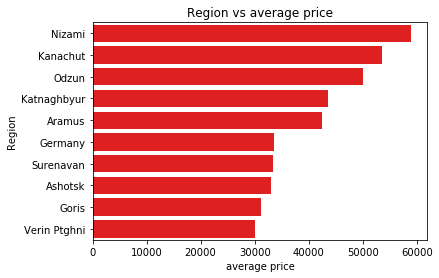

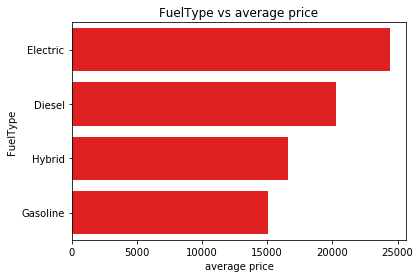

In [14]:
# barplot visualization
colum_categories = ['Region','FuelType']

for col in colum_categories:
    data = df.groupby([col])['Price'].mean().sort_values(ascending=False).head(10)
    sns.barplot(x=data.values, y=data.index, color='red')
    plt.title(f'{col} vs average price')
    plt.xlabel('average price')
    plt.show()

In [15]:
# cheack count unique values of Region
df['Region'].nunique()

195

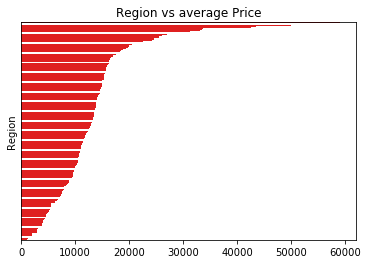

In [16]:
# revisualize colum Region for all values
region_vs_avrgprice = df.groupby(['Region'])['Price'].mean().sort_values(ascending=False)

sns.barplot(x=region_vs_avrgprice.values, y=region_vs_avrgprice.index, color='red')
plt.title('Region vs average Price')
plt.yticks([])
plt.show()

In [17]:
# because colum FuelType & Region have correlation
# we will place those in list importand_colum
importand_colum.append('FuelType')
importand_colum.append('Region')

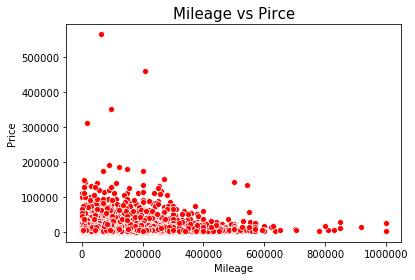

In [18]:
# scatterplot visuallization
sns.scatterplot(x='Mileage',y='Price', data=df, color='red')
plt.title('Mileage vs Pirce',fontsize=15)
plt.show()

In [19]:
# we will palce this colum too
importand_colum.append('Mileage')

# data preprocessing

In [20]:
# see 5 first rows of the dataset
df.head()

,Car Name,Year,Region,FuelType,Mileage,Price
0,Ford Transit,2002,Goris,Diesel,215000,12000
1,Ford Focus,2017,Ijevan,Gasoline,72000,11500
2,Opel Vectra,1998,Armavir,Gasoline,466000,4000
3,Mazda 6,2020,Nor Nork,Gasoline,100000,22000
4,Opel Vectra,1998,Armavir,Gasoline,318000,3500


In [21]:
# conversion type to categorical
from pandas.api.types import CategoricalDtype
categorical_type = CategoricalDtype(['Gasoline','Hybrid','Diesel','Electric'],ordered=True)

df['FuelType'] = df['FuelType'].astype(categorical_type)
df.dtypes

Car Name      object
Year           int64
Region        object
FuelType    category
Mileage        int64
Price          int64
dtype: object

In [22]:
# check
df['FuelType'].sort_values().unique() 

[Gasoline, Hybrid, Diesel, Electric]
Categories (4, object): [Gasoline < Hybrid < Diesel < Electric]

In [23]:
data_LE = df['FuelType'].sort_values().unique()

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(data_LE)

LabelEncoder()

In [24]:
# check the ordered categories
LE.classes_ 

array(['Diesel', 'Electric', 'Gasoline', 'Hybrid'], dtype=object)

In [25]:
# recheck dtpyes
df.dtypes 

Car Name      object
Year           int64
Region        object
FuelType    category
Mileage        int64
Price          int64
dtype: object

### i have a problem
i want to transform the FuelType data colum with:

Gasoline = 0

HyBrid = 1

Diesel = 2

Electric = 3

but i cant do that with Label Encoder, there for i decided to transform data manually

#### if you know, you can solve this problem and make pull request in my github

In [26]:
# make a function for transform FuelType colum
def FuelTypeTransform(data):
    result = []
    for d in data:
        if d == 'Gasoline':
            result.append(0)
        elif d == 'Hybrid':
            result.append(1)
        elif d == 'Diesel':
            result.append(2)
        elif d == 'Electric':
            result.append(3)
        else :
            result.append('-')
    return result

# make function for return transform of FuelType colum
def FuelTypeInverse(data):
    result = []
    for d in data:
        if d == 0:
            result.append('Gasoline')
        elif d == 1:
            result.append('Hyrid')
        elif d == 2:
            result.append('Diesel')
        elif d == 3:
            result.append('Electric')
        else :
            result.append('-')
    return result

In [27]:
# testing function
test = FuelTypeTransform(df['FuelType'].head())
test

[2, 0, 0, 0, 0]

In [28]:
FuelTypeInverse(test)

['Diesel', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline']

In [29]:
# check result function
df['FuelType'].head() 

0      Diesel
1    Gasoline
2    Gasoline
3    Gasoline
4    Gasoline
Name: FuelType, dtype: category
Categories (4, object): [Gasoline < Hybrid < Diesel < Electric]

In [30]:
# execute the function
df['FuelType'] = FuelTypeTransform(df['FuelType'])

In [31]:
# check
df.head() 

,Car Name,Year,Region,FuelType,Mileage,Price
0,Ford Transit,2002,Goris,2,215000,12000
1,Ford Focus,2017,Ijevan,0,72000,11500
2,Opel Vectra,1998,Armavir,0,466000,4000
3,Mazda 6,2020,Nor Nork,0,100000,22000
4,Opel Vectra,1998,Armavir,0,318000,3500


In [32]:
# make ordered data of Region bases on average price
avrg_price_by_region = df.groupby(['Region'])['Price'].mean().sort_values(ascending=True)
ordered_region = avrg_price_by_region.index.tolist()
ordered_region[-10:]

['Verin Ptghni',
 'Goris',
 'Ashotsk',
 'Surenavan',
 'Germany',
 'Aramus',
 'Katnaghbyur',
 'Odzun',
 'Kanachut',
 'Nizami']

In [33]:
# make a function for transform Region colum
def RegionTransform(data):
    result = []
    for d in data:
        if d in ordered_region:
            result.append(ordered_region.index(d))
        else:
            result.append('-')
    return result

# make function for return transform of Region colum
def RegionInverse(data):
    result = []
    for d in data:
        result.append(ordered_region[d])
    return result

In [34]:
# test function
test = RegionTransform(df['Region'].head())
test

[186, 128, 155, 151, 155]

In [35]:
RegionInverse(test)

['Goris', 'Ijevan', 'Armavir', 'Nor Nork', 'Armavir']

In [36]:
# check function result
df['Region'].head()

0       Goris
1      Ijevan
2     Armavir
3    Nor Nork
4     Armavir
Name: Region, dtype: object

In [37]:
# execute function
df['Region'] = RegionTransform(df['Region'])

In [38]:
# check final dataset after data cleaning
df.head() 

,Car Name,Year,Region,FuelType,Mileage,Price
0,Ford Transit,2002,186,2,215000,12000
1,Ford Focus,2017,128,0,72000,11500
2,Opel Vectra,1998,155,0,466000,4000
3,Mazda 6,2020,151,0,100000,22000
4,Opel Vectra,1998,155,0,318000,3500


# splitting data

In [39]:
# split the feature and label
X = df[importand_colum]
y = df['Price']

In [40]:
# splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)

In [41]:
# check proportion of data
X_train.shape, X_test.shape

((6388, 3), (1598, 3))

# feature engineering

In [50]:
# make the scaler function with scikit learn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,10))

In [51]:
# fit and transform feature
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[0.00000000e+00, 7.87564767e+00, 3.49903499e-01],
       [0.00000000e+00, 6.32124352e+00, 1.77991780e+00],
       [0.00000000e+00, 5.75129534e+00, 2.89992900e+00],
       ...,
       [0.00000000e+00, 5.75129534e+00, 2.64002640e-02],
       [0.00000000e+00, 5.95854922e+00, 1.74901749e-01],
       [0.00000000e+00, 9.79274611e+00, 8.00008000e-05]])

In [52]:
# transform X_test
y_train_scaled = scaler.fit_transform(X_test)

# modelling

In [79]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

param_grid = {'copy_X':[True,False],
              'fit_intercept': [True, False],
              'normalize': [True, False],
             'n_jobs':[-1,1,2,3]}
grid = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, scoring='r2', cv=5)
grid.fit(X_train,y_train)
print(f'Best param : {grid.best_params_}')

Best param : {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': True}


In [80]:
# make and fit model function
model = LinearRegression(fit_intercept=True,n_jobs=-1, normalize=True)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

# testing and evaluation model

In [82]:
# make a dataframe of testing result
y_pred = model.predict(X_test)

df_eval = pd.DataFrame({'y_test':y_test,
                       'y_pred':y_pred})
df_eval.head(10)

,y_test,y_pred
5209,5700,12134.643261
1055,14500,18476.278096
7861,19500,7245.038383
1732,17500,18576.300290
6063,12000,17086.690821
7426,44000,26086.638384
1084,8000,18110.067807
2549,15000,17337.814103
3964,14000,14166.308469
2298,3400,17356.779215


In [83]:
# evaluasi model with MAE & MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print(f'MAE : {mae}')
print(f'MSE : {mse}')

MAE : 9893.979481555078
MSE : 382772369.002781


In [93]:
# check variens & standart deviation label
var = np.var(y_test)
std = np.std(y_test)

print(f'Standard deviation\t: {std}')
print(f'Variens\t\t\t: {var}')

Standard deviation	: 19874.298735454224
Variens			: 394987750.2260774
